In [37]:
#구글에서 만든 머신러닝을 위한 라이브러리 (python , c)

#tensorflow 이용
#hello world 를 출력

import tensorflow as tf

# tensorflow와 구성요소
# 1.mode : 수학적인 연산을 담당 , 데이터의 입출력 
# 2.tensor : 다차원 array(matrix)
# 3. edge : 한 node가 가지고 있는 tensor를 다른 node로 이용

#한줄한줄 되는게 아님 전체적인 그래프를 가지고 실행시키는

my_node = tf.constant("hello") 

#노드 엣지 를 연결하고  해당노드와 연결되어있는 노드들이 다같이 실행되는것 동작을 시키는순간 데이터가 움직임


print(my_node)




print(sess.run(my_node)) # 바이트 계열 문자열이고 decode로 쓰면 일반문자열로 바뀜

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1+node2

print(node1,node2,node3)

sess= tf.Session()

#sess.run([node1,node2,node3])

print(sess.run(node3))

#shape => (3,4)






Tensor("Const_21:0", shape=(), dtype=string)
b'hello'
Tensor("Const_22:0", shape=(), dtype=float32) Tensor("Const_23:0", shape=(), dtype=float32) Tensor("add_16:0", shape=(), dtype=float32)
30.0


In [23]:
# placeholder # 데이터를 받아들이는 그릇
import tensorflow as tf



node1 = tf.placeholder(dtype=tf.float32)
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1+node2



sess= tf.Session()

#sess.run(node3,feed_dict={node1:input() , node2: input()})

#sess.run(node3,feed_dict={node1:[1,2,3] , node2:[10,20,3]})


sess.run(node3,feed_dict={node1:[input("node1-1 :"),input("node1-2 :"),input("node1-3 : ")] , node2:[10,20,3]})








node1-1 :50
node1-2 :40
node1-3 : 60


array([60., 60., 63.], dtype=float32)

In [36]:
#텐서와 노드와 엣지로 구성되어있는 

import tensorflow as tf

node1 = tf.constant([1,2,3], dtype=tf.float32)

node1



<tf.Tensor 'Const_20:0' shape=(3,) dtype=float32>

In [98]:
# 간단한 (입력x축 인수가 하나 y축도 하나)linear regression 을 이용한 machine learning

import tensorflow as tf


# training data set

#독립변수 가 하나일때 종속변수 가 하나일때 심플
#다중선형회기 멀티플 입력 독립변수 가 여러개 
# ex) 공부에 영향이 공부시간 말고도 여러가지 더 있을때를 뜻함

#x=[1,2,3] # 독립변수 , 입력데이터 

#y=[3,5,7] # 종속변수 , 입력데이터의 label 꼬리표 한마디로 오리사진에 duck이라는 꼬리표 달았듯이 1입력데이터에 1이라는 라벨이 달림

x=tf.placeholder(dtype=tf.float32) #밑에 FEED_DICT 에 값 입력 sess.run 쪽
y=tf.placeholder(dtype=tf.float32)


#training data set 이 만들어지면 그다음은?

#가설을 만들어야함 적합한 선을 찾는것 점에 맞는 1차함수 구하는것 y=ax+b

# w와 b의 초기값은 랜덤

w = tf.Variable(tf.random_normal([1]),name="weight") #초기값이 텐서플로에 normal 정규분포에서 추출 
display(w)
b = tf.Variable(tf.random_normal([1]),name="bias")

x_data=[1,5,3]
y_data=[1,5,4]


#Hypothesis(우리가 최종적으로 알아내야 하는 직선)
# 데이터에 가장 인접한 직선
# 예측모델이 만들어짐
# prediction 이 가능

h=w*x+b

#h

#최적의 w와 b를 구해야함 최소제곱법 리얼 데이터와의 차 의 평균 

# 평균 합계를전체로 나워서 평균을 구하는것 cost함수

#Cost function(Loss function , 비용함수)

#Cost function 이 최소가되는 w와 b값을 구하는것이 목적 

cost = tf.reduce_mean(tf.square(h-y)) # square 함수 = 제곱   , reduce_mean 평균
print("w:",w)
print("b:",b)
print(cost)

#cost function의 minimize

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01) #내가가장빠르게 산에서 내려가고싶을때? 
                                                # 반경1m중 경사가 깊은곳 계속감 
    
train=optimizer.minimize(cost) #현재 cost값보다 1단계 줄이는거  인데 계속 for문처럼 돌리면 가장 낮은값으로 떨어짐
                                              #자기보다 최소값을 찾는데 가장 쉽게 접근하는 알고리즘


# 미분작업해야하는데 라이브러리로 일단 함

sess = tf.Session()

#variable 을 사용할 경우 초기화를 시켜줘야함

sess.run(tf.global_variables_initializer())# 초기화
print("=======================")
for step in range(3000):
    _,w_val, b_val , cost_val = sess.run([train,w,b,cost],feed_dict={x:x_data , y:y_data})
    if step %300 ==0:
        print("w:{} , b:{} , cost:{}".format(w_val, b_val , cost_val))

sess.run(h,feed_dict={x:10})


<tf.Variable 'weight_52:0' shape=(1,) dtype=float32_ref>

w: <tf.Variable 'weight_52:0' shape=(1,) dtype=float32_ref>
b: <tf.Variable 'bias_52:0' shape=(1,) dtype=float32_ref>
Tensor("Mean_48:0", shape=(), dtype=float32)
w:[-0.03513867] , b:[-1.9427848] , cost:56.029083251953125
w:[1.1356091] , b:[-0.18435544] , cost:0.2840806543827057
w:[1.0374173] , b:[0.19049215] , cost:0.22693151235580444
w:[1.0103242] , b:[0.2939206] , cost:0.22258074581623077
w:[1.0028486] , b:[0.32245862] , cost:0.22224967181682587
w:[1.0007861] , b:[0.3303325] , cost:0.22222429513931274
w:[1.0002171] , b:[0.33250478] , cost:0.22222238779067993
w:[1.0000601] , b:[0.33310434] , cost:0.2222222536802292
w:[1.0000165] , b:[0.33327013] , cost:0.22222234308719635
w:[1.0000049] , b:[0.33331513] , cost:0.22222207486629486


array([10.333346], dtype=float32)

[5.248690727326483,
 2.7764871726998495,
 4.943656495473089,
 5.854062755687659,
 11.730815258649358,
 7.396922606239435,
 17.489623528432958,
 14.477586198209794,
 18.638078192114197,
 19.50125924904518,
 24.92421587408995,
 19.879718581004692,
 25.355165591972984,
 27.231891290663167,
 32.26753888467088,
 29.800217465371936,
 33.65514358489913,
 34.24428316415726,
 38.084427493431185,
 41.165630427431644]

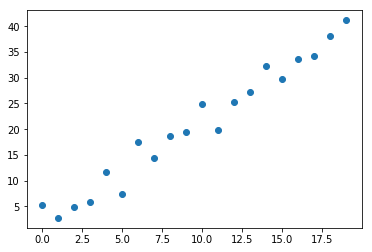

In [11]:
# 기본적인 linear repression 예제
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(1)

#training data set
x_data =np.arange(0,20,1)#np.random.randint

y_data = [t*2 + np.random.normal(2,2) for t in x_data]
x_data

display(y_data)
plt.scatter(x_data,y_data)

plt.show()




array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

array([ 5.24869073,  2.77648717,  4.9436565 ,  5.85406276, 11.73081526,
        7.39692261, 17.48962353, 14.4775862 , 18.63807819, 19.50125925,
       24.92421587, 19.87971858, 25.35516559, 27.23189129, 32.26753888,
       29.80021747, 33.65514358, 34.24428316, 38.08442749, 41.16563043])

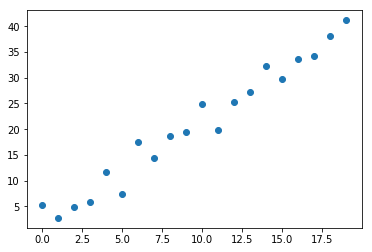

In [14]:
# 기본적인 linear repression 예제
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(1)

#training data set
x_data =np.arange(0,20,1)#np.random.randint

y_data =np.array([t*2 + np.random.normal(2,2) for t in x_data])

display(x_data)
display(y_data)
plt.scatter(x_data,y_data)

plt.show()





cost:30.33957862854004
cost:0.2586478292942047
cost:0.10347706079483032
cost:0.06686309725046158
cost:0.05822363123297691
cost:0.056185152381658554
cost:0.055704087018966675
cost:0.05559063330292702
cost:0.05556381866335869
cost:0.05555740371346474


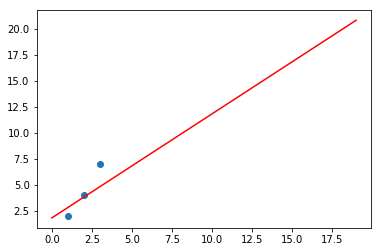

array([36.82327], dtype=float32)

In [138]:
# 기본적인 linear repression 예제
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(12345)

#training data set 데이터 준비
#보통 트레이닝 데이터가 값이 어느이상 넘게되면 이상한 값이 나와서 표준화 방식같은게 나옴 
#x_data =np.arange(0,20,1)  #np.random.randint
#y_data =np.array([t*2 + np.random.normal(2,2) for t in x_data])

x_data=[1,2,3]
y_data=[2,4,7]


#눈으로 확인 
plt.scatter(x_data,y_data)
#plt.show()


#placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)


#weight 와 bias

w=tf.Variable(tf.random_normal([1]),name="weight")
b=tf.Variable(tf.random_normal([1]),name="bias")


h=w*x+b

#ost function 최소화 작업 -> 학습이라고 표현
cost=tf.reduce_mean(tf.square(h-y))




#train
#옵티마이저를 만들어서 코스트함수를 살짝 줄이기위해 minimize 를 통해 줄여봐
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)




#그래프를 동작시킬수있는 새션, 러너 , 해당 변수 variable 초기화 필요

sess=tf.Session() #새션

sess.run(tf.global_variables_initializer()) #런과 초기화

#학습 w와 b를 최소화시키는 과정 

#3천번 반복해서 학습 나중에 에포라는 단어도 나옴  이건 즉 3천에포라는 뜻

for step in range(3000):  
    _,cost_value = sess.run([train,cost], feed_dict={x:x_data , y:y_data}) #노드가 가지고있는값이 튕겨나옴 튜플형태로
    if step%300 ==0:
        print("cost:{}".format(cost_value))

        
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)


#학습이 정상적으로 이루어지면 w와 b갓이 결정됨 

x_line =np.arange(0,20,1)#np.random.randint

y_line =np.array([sess.run(w)+t+sess.run(b) for t in x_line])

plt.plot(x_line,y_line,"r")

plt.show()

h_value=sess.run(h,feed_dict={x:15})

h_value

#입력데이터에 대한 처리가 이루어져야 정상적으로 학습이 진행됨

In [ ]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(12345)

#training data set 데이터 준비
#보통 트레이닝 데이터가 값이 어느이상 넘게되면 이상한 값이 나와서 표준화 방식같은게 나옴 
#x_data =np.arange(0,20,1)  #np.random.randint
#y_data =np.array([t*2 + np.random.normal(2,2) for t in x_data])

x_data=[1,2,3]
y_data=[2,4,7]


#눈으로 확인 
plt.scatter(x_data,y_data)
plt.show()


#placeholder
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)


#weight 와 bias

w=tf.Variable(tf.random_normal([1]),name="weight")
b=tf.Variable(tf.random_normal([1]),name="bias")


h=w*x+b

#ost function 최소화 작업 -> 학습이라고 표현
cost=tf.reduce_mean(tf.square(h-y))




#train
#옵티마이저를 만들어서 코스트함수를 살짝 줄이기위해 minimize 를 통해 줄여봐
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#그래프를 동작시킬수있는 새션, 러너 , 해당 변수 variable 초기화 필요

sess=tf.Session() #새션

sess.run(tf.global_variables_initializer()) #런과 초기화

#학습 w와 b를 최소화시키는 과정 

#3천번 반복해서 학습 나중에 에포라는 단어도 나옴  이건 즉 3천에포라는 뜻

for step in range(3000):  
    _,cost_value = sess.run([train,cost], feed_dict={x:x_data , y:y_data}) #노드가 가지고있는값이 튕겨나옴 튜플형태로
    if step%300 ==0:
        print("cost:{}".format(cost_value))

        
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)


#학습이 정상적으로 이루어지면 w와 b갓이 결정됨 

x_line =np.arange(0,20,1)#np.random.randint

y_line =np.array([sess.run(w)+t+sess.run(b) for t in x_line])

plt.plot(x_line,y_line,"r")

plt.show()

h_value=sess.run(h,feed_dict={x:15})

h_value

#입력데이터에 대한 처리가 이루어져야 정상적으로 학습이 진행됨

168.0
0      0.239521
1      0.209581
2      0.065868
3      0.101796
6      0.131737
7      0.107784
8      0.041916
11     0.089820
12     0.059880
13     0.077844
14     0.101796
15     0.077844
16     0.197605
17     0.029940
18     0.173653
19     0.059880
20     0.000000
21     0.059880
22     0.017964
23     0.185629
27     0.131737
28     0.263473
29     0.682635
30     0.215569
37     0.167665
39     0.419162
40     0.227545
43     0.131737
46     0.119760
47     0.215569
         ...   
122    0.502994
123    0.568862
124    0.461078
125    0.431138
126    0.538922
127    0.275449
128    0.185629
129    0.113772
130    0.131737
131    0.119760
132    0.137725
133    0.257485
134    0.119760
135    0.161677
136    0.047904
137    0.071856
138    0.269461
139    0.101796
140    0.071856
141    0.137725
142    0.089820
143    0.071856
144    0.131737
145    0.209581
146    0.035928
147    0.077844
148    0.173653
150    0.077844
151    0.101796
152    0.113772
Name: Ozone, Lengt

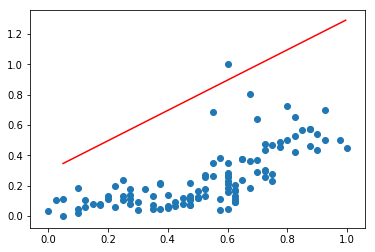

array([0.2950892], dtype=float32)

In [160]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


### ozone 데이터를 이용한 linear regression
#nan nan nan 나오는거 전처리가 필요 asdsa
# normalization , standardization 이용 데이터 전처리

data=pd.read_csv('./data/ozone/ozone.csv', sep=",")
#standardiztion : 현재값-평균 / 표준편차

#nomalization : 현재값 -가장 작은값 / max값-min값 -> 항상 1아래 값 

print(stand)


#nan 지우기
data1=data.dropna(how= "any", inplace=False ) #원본 보존

stand1 = (data1["Ozone"]-data1["Ozone"].min())/(data1["Ozone"].max()-data1["Ozone"].min())
stand2 = (data1["Temp"]-data1["Temp"].min())/(data1["Temp"].max()-data1["Temp"].min())
print(stand1)

x_data=stand2
y_data=stand1

#눈으로 확인 
plt.scatter(x_data,y_data)
#plt.show()


x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)


#weight 와 bias

w=tf.Variable(tf.random_normal([1]),name="weight")
b=tf.Variable(tf.random_normal([1]),name="bias")


h=w*x+b

#ost function 최소화 작업 -> 학습이라고 표현
cost=tf.reduce_mean(tf.square(h-y)) #cost 함수가 2차함수로 표현됨 


train = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost)

#그래프를 동작시킬수있는 새션, 러너 , 해당 변수 variable 초기화 필요

sess=tf.Session() #새션

sess.run(tf.global_variables_initializer()) #런과 초기화

#학습 w와 b를 최소화시키는 과정 

#3천번 반복해서 학습 나중에 에포라는 단어도 나옴  이건 즉 3천에포라는 뜻

for step in range(20000):  
    _,cost_value = sess.run([train,cost], feed_dict={x:x_data , y:y_data}) #노드가 가지고있는값이 튕겨나옴 튜플형태로
    if step%1000 ==0:
        print("cost:{}".format(cost_value))

        
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.00001)


#학습이 정상적으로 이루어지면 w와 b갓이 결정됨 

x_line =np.arange(0.05,1,0.005)#np.random.randint

y_line =np.array([sess.run(w)+t+sess.run(b) for t in x_line])

plt.plot(x_line,y_line,"r")

plt.show()

h_value=sess.run(h,feed_dict={x:1})

h_value


LinregressResult(slope=2.4391099055293637, intercept=-147.6460723805951, rvalue=0.6985414096486391, pvalue=1.5526772293928758e-17, stderr=0.23931937849409174)


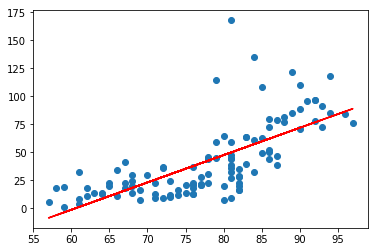

In [177]:
#위에껄 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats







#data loading
data=pd.read_csv('./data/ozone/ozone.csv', sep=",")

#nan 지우기
data1=data.dropna(how= "any", inplace=False ) #원본 보존

x=df["Temp"]
y=df["Ozone"]

result=stats.linregress(x,y)

print(result)
w=result[0]
b=result[1]

h=w*x+b

plt.scatter(x,y)

plt.plot(x,h,"r")

plt.show()





In [3]:
from skilean.preprocessing import MinMaxScaler

#딥러닝과 머신러닝은 로지스틱으로 함 리니어는 여기 까지오기위한 과정 이해도움 뿐
#리니어 리그레이션 다시










ModuleNotFoundError: No module named 'skilean'

Tensor("Mean_18:0", shape=(), dtype=float32)
cost:12.163778305053711
cost:0.04712691903114319
cost:0.04363716393709183
cost:0.04354017972946167
cost:0.04353749379515648
cost:0.04353741556406021
cost:0.04353742673993111
cost:0.04353741928935051
cost:0.04353741928935051
cost:0.04353741928935051


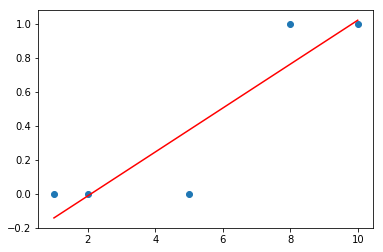

array([5.973681], dtype=float32)

In [33]:

#딥러닝과 머신러닝은 로지스틱으로 함 리니어는 여기 까지오기위한 과정 이해도움 뿐
#리니어 리그레이션 다시


%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt #실제 그림을 그리기위함
import tensorflow as tf
from scipy import stats
#입력 값이 simple linear regression

#학습데이터 준비 training datas set
x_data=[10,8,5,2,1]
y_data=[1,1,0,0,0]

#플레이스 홀더 입력공간을 준비 플레이스홀더에 데이터를 맵핑시켜서 쓰는것


x=tf.placeholder(dtype=tf.float32)
y=tf.placeholder(dtype=tf.float32)


#weight & bias 준비 내부적으로 값이 계속 변해서 변수로

#초기 w,b값은 난수하나씩

w=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")


h=w*x+b

#비용함수 cost function -> 최소 제곱법 ,공분산과 최소어쩌고도 있는데 최소 제곱법을 주로사용
#기본적인 최소 제곱법같은 원리를 알아야함
#이 코스트 함수가 2차함수 모양이됨 맨 아래 점을 찾아야함
cost=tf.reduce_mean(tf.square(h-y))
print(cost)

#이 최소제곱법이 가장 작은수가 우리가 찾는 결과값이 됨
#상황에따라 learning_rate 값이 달라짐
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#print(cost)


#세션 초기화 -> 런을 만들고 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={x:x_data , y:y_data})
    
    if step%300==0 :
        print("cost:{}".format(cost_val))



plt.scatter(x_data,y_data)
plt.plot(x_data,sess.run(w)*x_data+sess.run(b), "r")
plt.show()
        

x=(0.5-sess.run(b))/sess.run(w)
x


#큰값이 들어가게되면 리니어 레그레이션으로는 오류가 발생함  

#그래서 로지스틱을 쓰게됨

#sigmoid function 이용해서 하이파시스가 바뀜

[9.96346605 4.59676542]
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


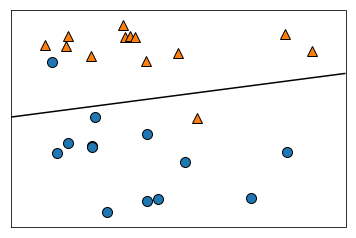

In [83]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn # sample data를 가져오기위한 유틸리티 

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt #실제 그림을 그리기위함
import tensorflow as tf
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.linear_model import LogisticRegression




warnings.filterwarnings(action="ignore")



#x: x파라미터 2개
#y: label(0 or 1)
x,y=mglearn.datasets.make_forge()

print(x[0])
print(x)
print(y)
 #0값이면 동그라미 1값이면 세모
mglearn.discrete_scatter(x[:,0],x[:,1],y)
model = LogisticRegression()

clf=model.fit(x,y)

mglearn.plots.plot_2d_separator(clf,x,fill=False , eps=0.5)


7
[[10, 0], [8, 1], [3, 3], [2, 3], [5, 1], [2, 0], [1, 0]]
[[1], [1], [1], [1], [0], [0], [0]]
(?, 2)
w:(2, 1)
cost:2.1150295734405518
cost:0.5899906158447266
cost:0.4839063584804535
cost:0.43273454904556274
cost:0.39603477716445923
cost:0.36782652139663696
cost:0.34549883008003235
cost:0.32742711901664734
cost:0.31251034140586853
cost:0.2999795377254486
정확도 =0.8571428656578064
예측값=[[0.]]
[10, 0]


AttributeError: 'Tensor' object has no attribute 'min'

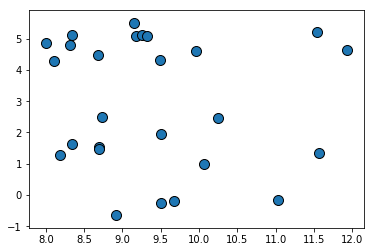

In [87]:
### 텐서플로를 이용한 로지스틱 리그레이션 0과 1로 떨어지는
#y측 레이블이 존재 

#training date set (2차원 matrix)

import tensorflow as tf

x_data=[[10,0],
        [8,1],
        [3,3],
        [2,3],
        [5,1],
        [2,0],
        [1,0] 
        ]
y_data=[[1],[1],[1],[1],[0],[0],[0]]

print(len(x_data))
print(x_data)

print(y_data)
#입력 파라미터의 역할을 하는 플레이스 홀더 상수로하지않고 변수로함
#placeholder

x= tf.placeholder(shape = [None,2],dtype=tf.float32) #2차원이면 shape 이 필요 어떤 메트릭스가 들어올지 명시해야함
y= tf.placeholder(shape = [None,1],dtype=tf.float32)

print(x.get_shape())

#밑에 행렬곱을 보면 x의 열값이 w의 행값으로 가야 곱셈이되고 y의 열값이 w의 열값으로가야함 # y=xw+b

w=tf.Variable(tf.random_normal([2,1]),name="weight" )  
b=tf.Variable(tf.random_normal([1]) , name="bias")
print("w:{}".format(w.get_shape()))
# h=tf.matmul(x,w)+b #멀티플에 하이파시스 여서 배열곱 x,w해줌
logit=tf.matmul(x,w)+b

h=tf.sigmoid(logit) # 𝐻𝑥=11+𝑒−(𝑋𝑊+𝑏) 이 수식을 해줌


#cost funtion
#𝑐𝑜𝑠𝑡𝐻𝑥,𝑦=𝑦log𝐻𝑥−(1−𝑦)log1−𝐻𝑥
#cost = -tf.reduce_mean(y* tf.log(h) + (1-y)*tf.log(1-h)  )
#위에 식들을 간략히
#인자가 2개들어감 
#𝑐𝑜𝑠𝑡(𝐻𝑥,𝑦) 에서 logits=>hx  ,  labels=> y 인듯


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,labels=y ))



train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#print(cost)


#세션 초기화 -> 런을 만들고 초기화
sess=tf.Session()
sess.run(tf.global_variables_initializer())

#학습

for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={x:x_data , y:y_data})
    
    if step%300==0 :
        print("cost:{}".format(cost_val))

        


        
#accuracy 예측값을 알아내는것 
predict = tf.cast(h>0.5 ,dtype=tf.float32) #원래는 정수를 실수로 , 실수를 정수로 바꿔주는 cast 타입변환 1.0 0.0 으로 변환인듯?
                                            #0.5보다 크면 1로 떨어짐
correct = tf.equal(predict,y) #실데이터와 예측한 것을 비교하는것 

accuracy = tf.reduce_mean(tf.cast(correct , dtype=tf.float32))


print("정확도 ={}".format(sess.run(accuracy ,feed_dict={x:x_data,y:y_data} ) ))


#prediction 예측

print("예측값={}".format(sess.run(predict, feed_dict={x:[[3,1]] })))


print(x_data[0])       

        
x_data,y_data=mglearn.datasets.make_forge()

mglearn.discrete_scatter(x_data[:,0],x_data[:,1],y)
model = LogisticRegression()

clf=model.fit(x_data,y_data)
mglearn.plots.plot_2d_separator(clf,x,fill=False , eps=0.5)
        


In [ ]:
###logistic egression 정리












In [ ]:
##머신 러닝 
#진짜 데이터 전처리가 중요하다고 생각함


# supervised learning (지도학습)
#   training data set 에 label이 붙어있다
#    1 => simple linear regression 
#   독립변수 입력 parameter가 1개인것을 지칭
#    hypothess h = wx+b

#    2 => multiple Linear Regression 
#    행렬이야기 시작 독립변수 가 2개이상인것을 지칭
#    행렬곱 표현 H = WX+b 대문자로 구분


# LOGSTIC 부터는 학습이 잘됐는지 안됐는지 혹인가능 

#    3 => LOGISTIC REGRESSION (LABEL 이 0 또는 1)
#    실제 현실에서 많이 이용되는 학습모델 EX) 도난카드 , 정상카드 구분
#    정확도 측정가능
#    다른말로 BINARY CLASSIFICATION => BINARY가 둘중하나 라는 뜻 0,1 분류모델중 하나
#    Hypothesis => H = WX+b => sigmoid(WX+b) 가설이 바뀌어 코스트 함수도 바뀜 가중치문제때문에 그래프를 s자로 그린것




# unsupervised learning (비지도학습)
# - training data set 에 label이 붙어 있지 않는경우














In [ ]:
#multinomial 

# 선을 찾아내는것

# 여러개의 로지스틱이 나타나는게 멀티노미어

# 원래 시그모이드 취해서 로지스틱이 되는데 

# 확률값을 취해서 어떤 선이 선택될지 확률을 나타내줌

# y축 구성이 여러개 3개이상 

# 엣 리스트? 이미지 판단 인식 ? 

# 둘중 하나는 로지스틱(0,1 사이값으로 바인딩)이고 세가지 이상은 멀티(확률)


In [2]:
#multinomial classification


import tensorflow as tf
import pandas as df

#데이터 로딩 대신 입력으로
#학습데이터 준비

x_data= [[10,8,7,6,7,5,3],[7,8,8,3,5,5,4],[8,9,2,9,7,6,3],[5,4,3,3,4,2,1]]


x=df.DataFrame(,x_data)

x
 y축 x축 바꿔서 입력해보기





SyntaxError: invalid syntax (<ipython-input-2-99b0776fc272>, line 11)

In [87]:

import tensorflow as tf
import pandas as df

#데이터 로딩 대신 입력으로
#학습데이터 준비

x_data= [[10,7,8,5],[8,8,9,4],[7,8,2,3],[6,3,9,3],[7,5,7,4],[3,5,6,2],[2,4,3,1]]
y_data=[[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1]] #원핫 인코딩

display(x_data)
#placeholder

X = tf.placeholder(shape=[None,4],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,3],dtype = tf.float32  )

W= tf.Variable(tf.random_normal([4,3]), name="weight"  )
b= tf.Variable(tf.random_normal([3]),name="bias")#얘가 이제 달라짐 3개로 로지스틱 몇개 뭉쳐있냐 즉 y데이터 구분하면 개수가 몇개냐


#가설 hypothesis 만들기

logit = tf.matmul(X,W)+b

H=tf.nn.softmax(logit) # 로지스틱은 signoid 쓰고 멀티는 softmax

# cost 함수 만들기 

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2( logits=logit , labels=Y ))
#라벨은 y 데이터즉  Y플레이스 홀더

#train

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#세션 과 세션 초기화
sess = tf.Session()

sess.run(tf.global_variables_initializer())


#학습 cost 값을 떨어뜨려가면서 실행을 포문에서 하는듯

for step in range(3000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,Y:y_data} )
    if step%300 == 0 :
        print("cost:{}".format(cost_val))
        

# h=ax+B
#predict = H  # H=> 0.3 0.6 0.1이런식으로 나올꺼

print(H)

predict=tf.argmax(H , 1)  #1의 의미 가로중 최대값 찾아서 인덱스 번호알려달라
correct=tf.equal(predict , tf.argmax(Y,1)) #내가 찾은 값과 가로중 최대값하고 같냐 틀리냐로 확인해서 잘 된 모델인지 판별

accuracy=tf.reduce_mean(tf.cast(correct , dtype=tf.float32))

print("정확도={}".format(sess.run(accuracy, feed_dict={X:x_data,Y:y_data} )) ) #원래 x_data 대신 새로운 값으로 비교해봐야함

print(sess.run(predict ,feed_dict={X:x_data}))
print(correct)
print(accuracy)
#예측 sess.run(H) => [[0.3,0.6,0.1]]
# feed_dict


print(sess.run(predict, feed_dict={X:[[10,7,8,5]]} )) #가장 어룰리는 인덱스 번호 값을 뽑아내는듯 a b c 이런식 

print(predict)



[[10, 7, 8, 5],
 [8, 8, 9, 4],
 [7, 8, 2, 3],
 [6, 3, 9, 3],
 [7, 5, 7, 4],
 [3, 5, 6, 2],
 [2, 4, 3, 1]]

cost:10.816996574401855
cost:0.7074248194694519
cost:0.6091589331626892
cost:0.5633979439735413
cost:0.5311527848243713
cost:0.5048084259033203
cost:0.4819425642490387
cost:0.46149301528930664
cost:0.4428873658180237
cost:0.4257744252681732
Tensor("Softmax_51:0", shape=(?, 3), dtype=float32)
정확도=0.8571428656578064
[1 0 1 1 1 2 2]
Tensor("Equal_43:0", shape=(?,), dtype=bool)
Tensor("Mean_93:0", shape=(), dtype=float32)
[1]
Tensor("ArgMax_89:0", shape=(?,), dtype=int64)


In [81]:
#

import tensorflow as tf
import numpy as np
import pandas as pd


data=pd.read_csv("./data/bmi/bmi.csv" , sep="," , skiprows = 3) #sep 는 csv가 ,로 구분되어있어서 defalt 값??
       #결치값 제거

data = data.dropna(how="any")
df_x = data[["height","weight"]]
df_y = data["label"]

print(df_x)

# df_y 를 분류해야함 100  010 001 , 0 1 2

y_data=tf.one_hot(df_y , 3)

sess=tf.Session()
sess.run(y_data)
df_y=pd.DataFrame(sess.run(y_data))


X = tf.placeholder(shape=[None,2],dtype = tf.float32  ) #행 숫자는 무상관
Y = tf.placeholder(shape=[None,3],dtype = tf.float32  )

W= tf.Variable(tf.random_normal([4,3]), name="weight"  )
b= tf.Variable(tf.random_normal([3]),name="bias")







       height  weight
0         188      71
1         161      68
2         178      52
3         136      63
4         145      52
5         123      45
6         135      59
7         169      45
8         120      46
9         154      75
10        136      60
11        158      46
12        132      41
13        152      59
14        131      53
15        165      59
16        188      55
17        129      43
18        122      61
19        197      80
20        142      72
21        168      38
22        157      41
23        153      67
24        168      47
25        127      39
26        148      47
27        160      40
28        179      59
29        186      73
...       ...     ...
19970     135      59
19971     132      37
19972     149      68
19973     196      65
19974     137      76
19975     149      69
19976     158      48
19977     120      61
19978     190      76
19979     148      37
19980     130      67
19981     149      42
19982     137      40
19983     